<a href="https://colab.research.google.com/github/dharma610/01-911-Calls-Data-Capstone-Project-/blob/master/SIR_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 8.3MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=34030e8b4434a744acb72d473e0fa7a28acf47df00d1ea6496783e4fb9a6e861
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [3]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [4]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [5]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [6]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [13]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [14]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [17]:
data = np.array(S_value.iloc[0]).reshape(100,1)

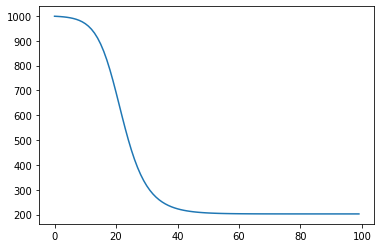

In [19]:
plt.plot(data)

In [20]:
train = data[0:70]
test = data[70:]

In [21]:
train

array([[999.        ],
       [998.35166923],
       [997.49427812],
       [996.36124296],
       [994.86539379],
       [992.89307037],
       [990.2968687 ],
       [986.886991  ],
       [982.42138743],
       [976.59531689],
       [969.03170415],
       [959.27482979],
       [946.79148972],
       [930.98561607],
       [911.23381822],
       [886.94902684],
       [857.67534346],
       [823.2073597 ],
       [783.71187875],
       [739.814401  ],
       [692.60771043],
       [643.55609785],
       [594.30576579],
       [546.45219499],
       [501.3335276 ],
       [459.90361216],
       [422.70108773],
       [389.89582971],
       [361.37729272],
       [336.85150909],
       [315.92544097],
       [298.16994608],
       [283.16123957],
       [270.50486486],
       [259.84721057],
       [250.87901332],
       [243.33419444],
       [236.98629363],
       [231.64391381],
       [227.14599454],
       [223.35734518],
       [220.16463386],
       [217.47289383],
       [215

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [26]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [27]:
scaled_train

array([[1.00000000e+00],
       [9.99185509e-01],
       [9.98108378e-01],
       [9.96684959e-01],
       [9.94805740e-01],
       [9.92327932e-01],
       [9.89066353e-01],
       [9.84782561e-01],
       [9.79172473e-01],
       [9.71853245e-01],
       [9.62351163e-01],
       [9.50093710e-01],
       [9.34411028e-01],
       [9.14554284e-01],
       [8.89740320e-01],
       [8.59231606e-01],
       [8.22455403e-01],
       [7.79153657e-01],
       [7.29535923e-01],
       [6.74388009e-01],
       [6.15082768e-01],
       [5.53459771e-01],
       [4.91587126e-01],
       [4.31469216e-01],
       [3.74787135e-01],
       [3.22739192e-01],
       [2.76002074e-01],
       [2.34789192e-01],
       [1.98961671e-01],
       [1.68150201e-01],
       [1.41861014e-01],
       [1.19554983e-01],
       [1.00699712e-01],
       [8.47996487e-02],
       [7.14105559e-02],
       [6.01439092e-02],
       [5.06654370e-02],
       [4.26906397e-02],
       [3.59790672e-02],
       [3.03283812e-02],


In [32]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [33]:
# What does the first batch look like?
X,y = generator[0]

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [35]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
58/58 [==============================] - 1s 14ms/step - loss: 0.0394
Epoch 2/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 3/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 4/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 5/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 6/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 7/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 8/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 9/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 10/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 11/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 12/50
58/58 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 13/50
58/58 [=============================

In [38]:
model.history.history.keys()

dict_keys(['loss'])

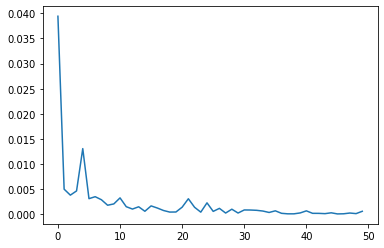

In [39]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [40]:
first_eval_batch = scaled_train[-12:]

In [41]:
first_eval_batch

array([[1.05562208e-03],
       [8.62325106e-04],
       [6.98812134e-04],
       [5.60489289e-04],
       [4.43472560e-04],
       [3.44477741e-04],
       [2.60727540e-04],
       [1.89873149e-04],
       [1.29927997e-04],
       [7.92117913e-05],
       [3.63032224e-05],
       [0.00000000e+00]])

In [42]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [43]:

model.predict(first_eval_batch)

array([[-0.00368121]], dtype=float32)

In [44]:
scaled_test[0]

array([-3.07149353e-05])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [45]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [46]:
current_batch.shape

(1, 12, 1)

In [47]:
current_batch

array([[[1.05562208e-03],
        [8.62325106e-04],
        [6.98812134e-04],
        [5.60489289e-04],
        [4.43472560e-04],
        [3.44477741e-04],
        [2.60727540e-04],
        [1.89873149e-04],
        [1.29927997e-04],
        [7.92117913e-05],
        [3.63032224e-05],
        [0.00000000e+00]]])

In [48]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[8.62325106e-04],
        [6.98812134e-04],
        [5.60489289e-04],
        [4.43472560e-04],
        [3.44477741e-04],
        [2.60727540e-04],
        [1.89873149e-04],
        [1.29927997e-04],
        [7.92117913e-05],
        [3.63032224e-05],
        [0.00000000e+00],
        [9.90000000e+01]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [49]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [50]:
test_predictions

[array([-0.00368121], dtype=float32),
 array([-0.00393001], dtype=float32),
 array([-0.00413847], dtype=float32),
 array([-0.00431907], dtype=float32),
 array([-0.00447642], dtype=float32),
 array([-0.00461412], dtype=float32),
 array([-0.00473498], dtype=float32),
 array([-0.00484129], dtype=float32),
 array([-0.00493494], dtype=float32),
 array([-0.00501746], dtype=float32),
 array([-0.00509024], dtype=float32),
 array([-0.00515436], dtype=float32),
 array([-0.00520945], dtype=float32),
 array([-0.00523787], dtype=float32),
 array([-0.00526144], dtype=float32),
 array([-0.00528101], dtype=float32),
 array([-0.00529725], dtype=float32),
 array([-0.00531067], dtype=float32),
 array([-0.00532173], dtype=float32),
 array([-0.0053308], dtype=float32),
 array([-0.00533822], dtype=float32),
 array([-0.00534422], dtype=float32),
 array([-0.00534904], dtype=float32),
 array([-0.00535287], dtype=float32),
 array([-0.00535588], dtype=float32),
 array([-0.00535821], dtype=float32),
 array([-0.00

In [51]:
scaled_test

array([[-3.07149353e-05],
       [-5.67019751e-05],
       [-7.86889925e-05],
       [-9.72917752e-05],
       [-1.13031283e-04],
       [-1.26348265e-04],
       [-1.37615613e-04],
       [-1.47148810e-04],
       [-1.55214775e-04],
       [-1.62039337e-04],
       [-1.67813565e-04],
       [-1.72699116e-04],
       [-1.76832765e-04],
       [-1.80330236e-04],
       [-1.83289440e-04],
       [-1.85793219e-04],
       [-1.87911663e-04],
       [-1.89704079e-04],
       [-1.91220641e-04],
       [-1.92503805e-04],
       [-1.93589490e-04],
       [-1.94508089e-04],
       [-1.95285316e-04],
       [-1.95942928e-04],
       [-1.96499335e-04],
       [-1.96970111e-04],
       [-1.97368435e-04],
       [-1.97705458e-04],
       [-1.97990613e-04],
       [-1.98231883e-04]])

## Inverse Transformations and Compare

In [52]:
true_predictions = scaler.inverse_transform(test_predictions)

In [53]:
true_predictions

array([[200.07452076],
       [199.87647785],
       [199.71054633],
       [199.5667909 ],
       [199.44153606],
       [199.3319277 ],
       [199.23572849],
       [199.15110141],
       [199.07655936],
       [199.01087174],
       [198.95293989],
       [198.90190388],
       [198.85805135],
       [198.83542749],
       [198.81666595],
       [198.80108916],
       [198.78816336],
       [198.77747637],
       [198.76867384],
       [198.76145182],
       [198.75554936],
       [198.75077372],
       [198.74693957],
       [198.74389123],
       [198.74149229],
       [198.73963601],
       [198.73810146],
       [198.73687382],
       [198.73588192],
       [198.73507239]])

In [54]:
test

array([[202.98029814],
       [202.95961258],
       [202.94211101],
       [202.92730329],
       [202.91477471],
       [202.90417446],
       [202.89520571],
       [202.88761733],
       [202.88119686],
       [202.87576454],
       [202.87116828],
       [202.8672794 ],
       [202.86398904],
       [202.86120507],
       [202.85884956],
       [202.85685656],
       [202.85517029],
       [202.85374353],
       [202.85253636],
       [202.85151496],
       [202.85065076],
       [202.84991956],
       [202.8493009 ],
       [202.84877744],
       [202.84833454],
       [202.84795981],
       [202.84764274],
       [202.84737447],
       [202.84714749],
       [202.84695544]])

In [56]:
# IGNORE WARNINGS
test = pd.DataFrame(test)
test['Predictions'] = true_predictions

In [57]:
test

,0,Predictions
0,202.980298,200.074521
1,202.959613,199.876478
2,202.942111,199.710546
3,202.927303,199.566791
4,202.914775,199.441536
5,202.904174,199.331928
6,202.895206,199.235728
7,202.887617,199.151101
8,202.881197,199.076559
9,202.875765,199.010872
